**Import Library**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

**Loading Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = "/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum06"

In [6]:
df = pd.read_csv(path + "/data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Statistik Deskriptif**

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Cek Nilai Unik**

In [9]:
df['target'].unique()

array([0, 1])

**Jumlah pada kolom target**

In [10]:
df['target'].value_counts()

,count
target,
1,526
0,499


**Pemilihan Fitur dan Label**

In [11]:
X = df.drop('target', axis=1)   # fiturnya menggunakan semua kolom kecuali 'target'
y = df['target']

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


**Split, standarisasi dan Bangun Model SVM**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_scaled, y_train)

SVC(C=1)

**Evaluasi Akurasi dan Report Klasifikasi**

In [15]:
y_pred = model.predict(X_test_scaled)

print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nReport Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 88.78%

Report Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



**Confusion Matrix**


Confusion Matrix:
 [[85 17]
 [ 6 97]]


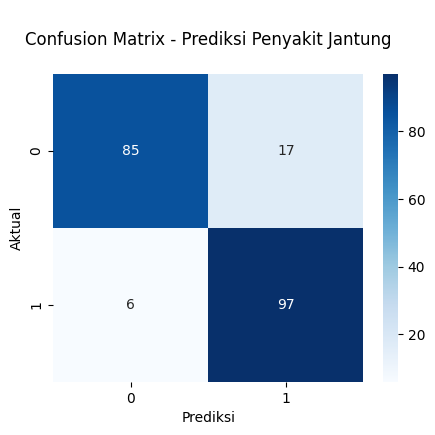

In [16]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('\nConfusion Matrix - Prediksi Penyakit Jantung\n')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

**Visualisasi Penyakit Jantung**

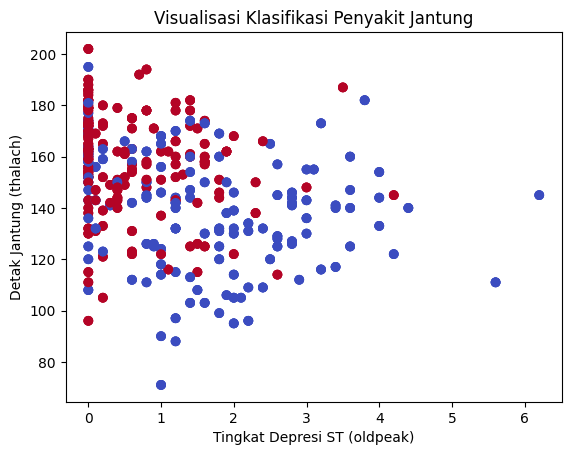

In [17]:
plt.scatter(df['oldpeak'], df['thalach'], c=df['target'], cmap='coolwarm')

plt.xlabel('Tingkat Depresi ST (oldpeak)')
plt.ylabel('Detak Jantung (thalach)')
plt.title('Visualisasi Klasifikasi Penyakit Jantung')
plt.show()

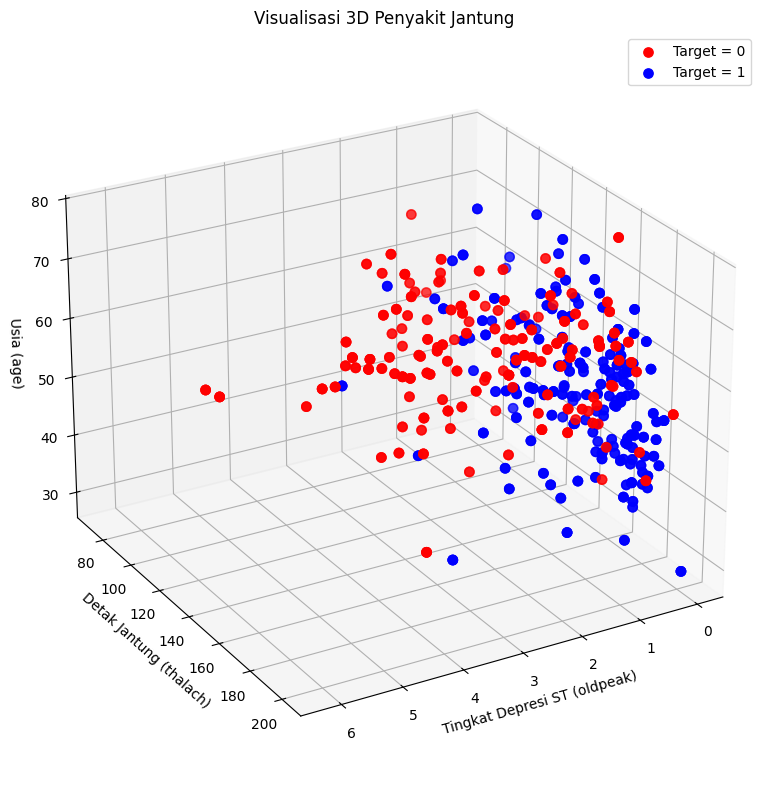

In [29]:
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'b']
labels = [0, 1]

for i, species in enumerate(labels):
    subset = df[df['target'] == i]
    ax.scatter(
        subset['oldpeak'],
        subset['thalach'],
        subset['age'],
        color=colors[i],
        label=f"Target = {species}",
        s=45
    )

ax.set_xlabel('Tingkat Depresi ST (oldpeak)')
ax.set_ylabel('Detak Jantung (thalach)')
ax.set_zlabel('Usia (age)')
ax.set_title('Visualisasi 3D Penyakit Jantung')
ax.legend()
ax.view_init(elev=25, azim=60)

plt.tight_layout()
plt.show()